INTRODUCTION 🔬

---
Crime in Los Angeles, like in many major cities, has been a complex and multifaceted issue. Historically, Los Angeles has struggled with various types of crime, including gang-related violence, drug trafficking, property crime, and white-collar crime. However, in recent years, there have been significant efforts by law enforcement agencies and community organizations to address these challenges.


***THE PROBLEM STATEMENT***

---

The main objective of developing a predictive model for classifying the race of individuals involved in criminal activities using LAPD crime data which can fulfill the following:  


1.   Crime Prevention Strategy
2.   Monitoring and Evalution
3.   Better Public Policies



---


For Evalution Metric, we'll take the following metrics:


1.   Precision and Recall
2.   Accuracy
3.   AOC/ROC Curve




**IMPORTING DEPENDENCIES**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials,anneal
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from imblearn.over_sampling import SMOTENC
from sklearn.feature_selection import SelectFromModel
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
import warnings
from sklearn.metrics import classification_report,roc_curve,RocCurveDisplay,auc,roc_auc_score
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)

**GETTING THE DATA**

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS.CSV/Crime_Data_from_2020_to_Present.csv')

In [ ]:
df.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Vict Descent
0,190326475,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,O
1,200106753,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,O
2,200320258,11/11/2020 0:00,11/4/2020 0:00,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,X
3,200907217,5/10/2023 0:00,3/10/2020 0:00,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,O
4,220614831,8/18/2022 0:00,8/17/2020 0:00,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277,H
5,231808869,4/4/2023 0:00,12/1/2020 0:00,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,1822 0100 0930 0929,41,M,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,9900 COMPTON AV,NaN,33.9467,-118.2463,H
6,230110144,4/4/2023 0:00,7/3/2020 0:00,900,1,Central,182,2,354,THEFT OF IDENTITY,0930 0929,25,M,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1100 S GRAND AV,NaN,34.0415,-118.2620,H
7,220314085,7/22/2022 0:00,5/12/2020 0:00,1110,3,Southwest,303,2,354,THEFT OF IDENTITY,100,27,F,248.0,CELL PHONE STORE,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,2500 S SYCAMORE AV,NaN,34.0335,-118.3537,B
8,231309864,4/28/2023 0:00,12/9/2020 0:00,1400,13,Newton,1375,2,354,THEFT OF IDENTITY,100,24,F,750.0,CYBERSPACE,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1300 E 57TH ST,NaN,33.9911,-118.2521,B
9,211904005,12/31/2020 0:00,12/31/2020 0:00,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,416,26,M,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,NaN,NaN,NaN,9000 CEDROS AV,NaN,34.2336,-118.4535,H


**PREPROCESSING DATA WITH EDA**

---



**checking data-types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901357 entries, 0 to 901356
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           901357 non-null  int64  
 1   Date Rptd       901357 non-null  object 
 2   DATE OCC        901357 non-null  object 
 3   TIME OCC        901357 non-null  int64  
 4   AREA            901357 non-null  int64  
 5   AREA NAME       901357 non-null  object 
 6   Rpt Dist No     901357 non-null  int64  
 7   Part 1-2        901357 non-null  int64  
 8   Crm Cd          901357 non-null  int64  
 9   Crm Cd Desc     901357 non-null  object 
 10  Mocodes         775767 non-null  object 
 11  Vict Age        901357 non-null  int64  
 12  Vict Sex        781966 non-null  object 
 13  Premis Cd       901347 non-null  float64
 14  Premis Desc     900807 non-null  object 
 15  Weapon Used Cd  312268 non-null  float64
 16  Weapon Desc     312268 non-null  object 
 17  Status    

**checking the percentage of na values**

In [ ]:
df.isna().sum()/len(df)

DR_NO             0.000000
Date Rptd         0.000000
DATE OCC          0.000000
TIME OCC          0.000000
AREA              0.000000
AREA NAME         0.000000
Rpt Dist No       0.000000
Part 1-2          0.000000
Crm Cd            0.000000
Crm Cd Desc       0.000000
Mocodes           0.139334
Vict Age          0.000000
Vict Sex          0.132457
Premis Cd         0.000011
Premis Desc       0.000610
Weapon Used Cd    0.653558
Weapon Desc       0.653558
Status            0.000000
Status Desc       0.000000
Crm Cd 1          0.000012
Crm Cd 2          0.927129
Crm Cd 3          0.997545
Crm Cd 4          0.999929
LOCATION          0.000000
Cross Street      0.842399
LAT               0.000000
LON               0.000000
Vict Descent      0.132466
dtype: float64

**Using imputation for treating the null values from target varaible**

In [ ]:
df["Vict Descent"] = df["Vict Descent"].fillna(df["Vict Descent"].mode()[0])

**Imputation for categorical variable**

In [ ]:
columns_to_impute = ["Vict Sex", "Mocodes", "Weapon Desc", "Cross Street"]

for column in columns_to_impute:
    most_frequent_value = df[column].mode()[0]
    df[column].fillna(most_frequent_value, inplace=True)


In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Vict Descent
0,190326475,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,344,0,M,101.0,STREET,NaN,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,BROADWAY,34.0375,-118.3506,O
1,200106753,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,BROADWAY,34.0444,-118.2628,O
2,200320258,11/11/2020 0:00,11/4/2020 0:00,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,BROADWAY,34.0210,-118.3002,X
3,200907217,5/10/2023 0:00,3/10/2020 0:00,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,405.0,CLOTHING STORE,NaN,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,BROADWAY,34.1576,-118.4387,O
4,220614831,8/18/2022 0:00,8/17/2020 0:00,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,102.0,SIDEWALK,NaN,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,BROADWAY,34.0944,-118.3277,H


**Exploring Numerical Variables along with a correlation heatmap**

In [ ]:
numerical_col = df.select_dtypes(include = [int,float]).columns
numerical_col = list(numerical_col)

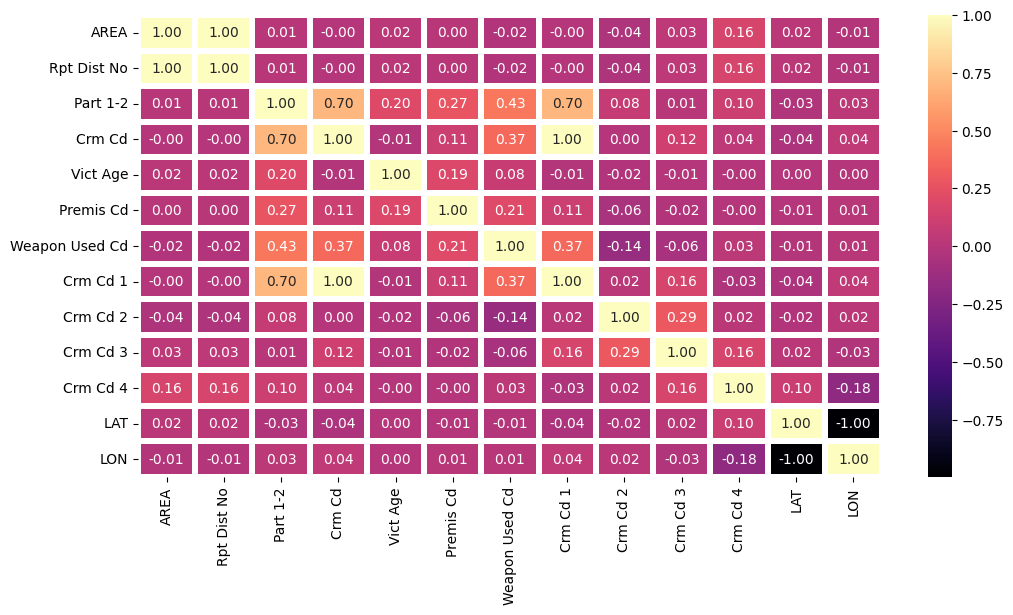

In [ ]:
numerical_col.remove('DR_NO')
numerical_col.remove('TIME OCC')




plt.figure(figsize = (12,6))
corr_mat = df[numerical_col].corr()
sns.heatmap(corr_mat, annot = True, cmap = "magma", linewidths = 3, fmt = "0.2f")
plt.show()

*  **Most Variables are not highly Correlated**

*   **"AREA" and "Rpt Dist No" have a Perfect Positive correlation**

*   **"Crm Cd" and "Crm Cd 1" have a Perfect Positive correlation**

*   **"Part 1-2" and "Crm Cd" are highly Correlated**

*   **"Part 1-2" and "Crm Cd" are highly Correlated**







**Dropping the following variables:**


*   DR_NO: ID's of the crimes
*   AREA: Perfect Postive correlation with "Rpt Dist No" variable
*   Crm Cd 1: Perfect Postive correlation with "Crm Cd" variable
*   Crm Cd 2: More than 90% of NA values
*   Crm Cd 3: More than 90% of NA values
*   Crm Cd 4: More than 90% of NA values




In [ ]:
df = df.drop(["AREA","DR_NO","Crm Cd 1","Crm Cd 2","Crm Cd 3","Crm Cd 4"], axis = 1 )


In [ ]:
numerical_col = df.select_dtypes(include = [int,float]).columns
numerical_col = list(numerical_col)

**Imputation of numerical values**

In [ ]:
df = df.dropna(subset = ["Premis Cd"])
df.loc[:, "Weapon Used Cd"] = df["Weapon Used Cd"].fillna(df["Weapon Used Cd"].mean())

In [ ]:
df= df.dropna(subset = ["Premis Desc"])

In [ ]:
df.isna().sum()/len(df)


Date Rptd         0.0
DATE OCC          0.0
TIME OCC          0.0
AREA NAME         0.0
Rpt Dist No       0.0
Part 1-2          0.0
Crm Cd            0.0
Crm Cd Desc       0.0
Mocodes           0.0
Vict Age          0.0
Vict Sex          0.0
Premis Cd         0.0
Premis Desc       0.0
Weapon Used Cd    0.0
Weapon Desc       0.0
Status            0.0
Status Desc       0.0
LOCATION          0.0
Cross Street      0.0
LAT               0.0
LON               0.0
Vict Descent      0.0
dtype: float64

**CHECKING FOR OUTLIERS USING BOXPLOT**


In [ ]:
numerical_col

['TIME OCC',
 'Rpt Dist No',
 'Part 1-2',
 'Crm Cd',
 'Vict Age',
 'Premis Cd',
 'Weapon Used Cd',
 'LAT',
 'LON']

Q1: 0.0, Q2:31.0, Q3:45.0


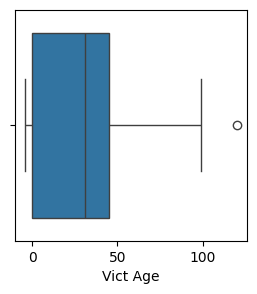

Q1: 101.0, Q2:203.0, Q3:501.0


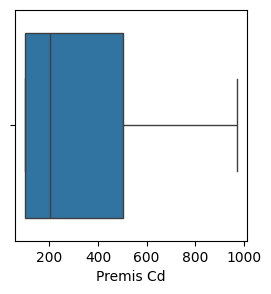

Q1: 363.44355489515414, Q2:363.44355489515414, Q3:400.0


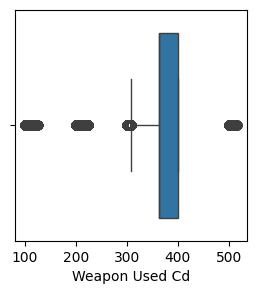

Q1: 34.0145, Q2:34.0586, Q3:34.1634


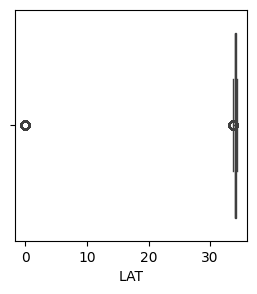

Q1: -118.4296, Q2:-118.3215, Q3:-118.2739


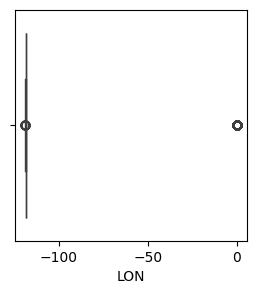

In [ ]:
for col in numerical_col:
  if col in ['Vict Age','LAT','LON','Premis Cd','Weapon Used Cd']:
    plt.subplots(figsize = (3,3))
    q1 = np.percentile(df[col],25)
    q2 = np.percentile(df[col],50)
    q3 = np.percentile(df[col],75)

    print(f"Q1: {q1}, Q2:{q2}, Q3:{q3}")




    sns.boxplot(x = df[col], orient = "h")
    plt.show()




*   **"Vict Age","LON" and "LAT" columns have few outliers**
*   **The median age of Victim is around 30 and above**
*   **"Premis Cd" has no outliers with median values falling at 200**
*   **"Weapon Used Cd" has a lot of outliers**
*   **Both "LAT" and "LON" have a small interquartile range**



**Imputation of the outlier values**

In [ ]:
outlier_num_col = ['Vict Age', 'LON']

for col in outlier_num_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr


    outliers_mask = (df[col] > upper_tail) | (df[col] < lower_tail)
    df.loc[outliers_mask, col] = np.median(df[col])


In [ ]:
outlier_num_col.append('Weapon Used Cd')
outlier_num_col.append('LAT')

for col in outlier_num_col:
  if col in ['Weapon Used Cd','LAT']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr

    outliers_mask = (df[col] > upper_tail) | (df[col] < lower_tail)
    df = df[~outliers_mask]




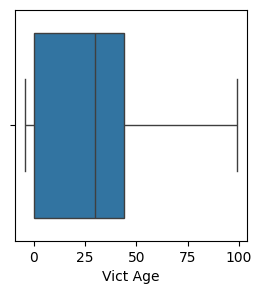

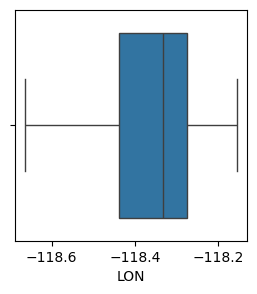

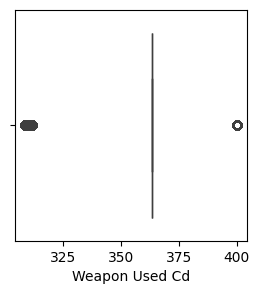

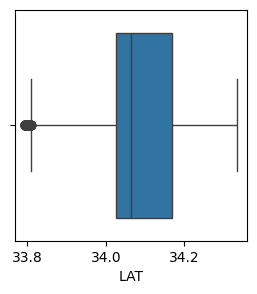

In [ ]:
for col in outlier_num_col:
  plt.subplots(figsize = (3,3))

  sns.boxplot(df[col], orient = 'h')
  plt.show()



*   **Outliers are somewhat prevented**



In [ ]:
df['Vict Descent'].nunique()

20

**CHECKING CLASS DISTRIBUTION**

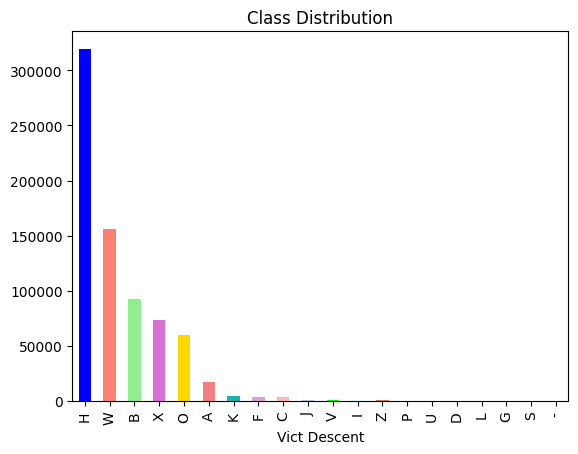

In [ ]:
colors = [
    'blue', 'salmon', 'lightgreen', 'orchid', 'gold',
    'lightcoral', 'lightseagreen', 'plum', 'lightpink', 'lightsteelblue',
    'lime', 'lightcyan', 'peru', 'lightyellow', 'khaki',
    'lightblue', 'mediumvioletred', 'mediumaquamarine', 'palevioletred', 'lightslategray'
]
df['Vict Descent'].value_counts().plot(kind='bar', color=colors)
plt.title("Class Distribution")
plt.show()



*   **Since there is an imbalance of class and a lot of ethnicities are clubbed under descent, therefore we'll group them by race as there are a lot of ethnicities of asian region with very few count**




In [ ]:
def mapper(val):
    if val in ['B', 'W', 'H', 'X']:
        return val
    else:
        return 'O'

In [ ]:
df['Vict Descent'] = df['Vict Descent'].map(mapper)

In [ ]:
class_colors = {
    'H': 'blue',
    'W': 'green',
    'B': 'red',
    'O': 'orange',
    'X': 'purple'
}
class_count = df['Vict Descent'].value_counts()/len(df) * 100
fig = px.bar(class_count,color=class_count.index, color_discrete_map=class_colors)
fig.update_layout(title="Distribution of Victim Descent")
fig.show()

**CHECKING THE UNIQUE CATEGORICAL VALUES**

In [ ]:
cat_columns = df.select_dtypes('object').columns

In [ ]:
cat_df=df[cat_columns]

In [ ]:
for col in cat_df:
  print("This col:",col ,len(cat_df[col].unique()))

This col: Date Rptd 1511
This col: DATE OCC 1511
This col: AREA NAME 21
This col: Crm Cd Desc 137
This col: Mocodes 194150
This col: Vict Sex 5
This col: Premis Desc 305
This col: Weapon Desc 5
This col: Status 6
This col: Status Desc 6
This col: LOCATION 60433
This col: Cross Street 8672
This col: Vict Descent 5


In [ ]:
num_columns = df.select_dtypes('int64','float64').columns

**TIME FORMAT IS IN 24 HOUR, WE MAY MAKE A CATEGORICAL COLUMN AS AN INTERPRETATION OF THE NUMERIC COLUMN FOR CONVENIENCE.**




In [ ]:
cat_time=[]
for item in df['TIME OCC']:
  if item>=400 and item<1200:
    cat_time.append('Morning')
  elif item>=1200 and item<1700:
    cat_time.append('Afternoon')
  elif item>=1700 and item<2100:
    cat_time.append('Evening')
  elif item>=2100 and item<=2359:
    cat_time.append('Night')
  elif item>=0000 and item<400:
    cat_time.append('Midnight')

In [ ]:
df['TIME'] = cat_time
print(df[cat_columns].shape)

(733081, 13)


In [ ]:
df.isna().sum()/len(df)

Date Rptd         0.0
DATE OCC          0.0
TIME OCC          0.0
AREA NAME         0.0
Rpt Dist No       0.0
Part 1-2          0.0
Crm Cd            0.0
Crm Cd Desc       0.0
Mocodes           0.0
Vict Age          0.0
Vict Sex          0.0
Premis Cd         0.0
Premis Desc       0.0
Weapon Used Cd    0.0
Weapon Desc       0.0
Status            0.0
Status Desc       0.0
LOCATION          0.0
Cross Street      0.0
LAT               0.0
LON               0.0
Vict Descent      0.0
TIME              0.0
dtype: float64

In [ ]:
df.head(1)

,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Vict Descent,TIME
0,3/1/2020 0:00,3/1/2020 0:00,2130,Wilshire,784,1,510,VEHICLE - STOLEN,344,0,M,101.0,STREET,363.443555,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,1900 S LONGWOOD AV,BROADWAY,34.0375,-118.3506,O,Night


**Dropping the "DATE OCC","Date Rptd","Status Desc" and " TIME OCC"**





In [ ]:
df = df.drop(['DATE OCC','Date Rptd',"Status Desc","TIME OCC"],axis = 1)




```
# This is formatted as code
```

**MODELING AND FEATURE ENGINEERING**

---



**Frequency encoding**

*   Cross Street
*   LOCATION
*   Mocodes
*   Premis Desc



In [ ]:
df_copy = df

In [ ]:
enco_dict = {}
freq_col = ['Cross Street','LOCATION','Mocodes','Premis Desc','Crm Cd Desc']


for col in freq_col:
   enco_dict[col] = (df[col].value_counts()).to_dict()

In [ ]:

for col in freq_col:
   df[col]= df[col].map(enco_dict[col])

**OneHotEncoding the following Variables**


*   Vict Sex
*   Status
*   TIME
*   Area Name




In [ ]:
df.columns

Index(['AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc',
       'Mocodes', 'Vict Age', 'Vict Sex', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'LOCATION', 'Cross Street',
       'LAT', 'LON', 'Vict Descent', 'TIME'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df, columns=['Vict Sex','Status','TIME','AREA NAME','Part 1-2'])


**Ordinal Encoding the following Variables**

*   Weapon Desc



In [ ]:
ord = OrdinalEncoder()
df[['Weapon Desc']] = ord.fit_transform(df[['Weapon Desc']])

**Taking Supervised and Unsupervised Column**

In [ ]:

y = df['Vict Descent']
df = df.drop(['Vict Descent'], axis = 1)
X = df.iloc[:,0:len(df.columns)-1]

**Scaling to maintain uniformity amongst Continous Variables using the standard Scaler**

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s
where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.   

In [ ]:
scaler = StandardScaler()
num_cols = X.select_dtypes(include = ['int64','float64'])
num_cols = list(num_cols)


X[['Rpt Dist No', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'LOCATION', 'Cross Street', 'LAT', 'LON']] = scaler.fit_transform(X[['Rpt Dist No', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'LOCATION', 'Cross Street', 'LAT', 'LON']])

**LABEL ENCODING TARGET VARIABLES**

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)


In [ ]:
X = pd.DataFrame(X)

**FEATURE SELECTION**

---



In [ ]:
clf = ExtraTreesClassifier(n_estimators = 200)
clf = clf.fit(X,y)
clf.feature_importances_
s2 = SelectFromModel(clf, prefit=True)
X = s2.fit_transform(X)

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X,y,random_state = 42, stratify = y,shuffle = True,test_size = 0.3)

**BASELINE MODEL**

---



#Log Regression

In [ ]:

classifier = LogisticRegression(C=0.01, solver='sag', max_iter=1000, penalty='l2', random_state=42,multi_class = 'ovr')
classifier.fit(X_train, y_train)
y_pred_logic = classifier.predict(X_val)
accuracy = accuracy_score(y_val,y_pred_logic)
print("Accuracy:", accuracy)

Accuracy: 0.5642969194043423


#RUNNING LDA

In [ ]:
lda = LinearDiscriminantAnalysis(solver='svd',tol = 0.002)
lda.fit(X_train, y_train)
X_train_transformed = lda.transform(X_train)
y_pred_lda = lda.predict(X_val)
print(f"Accuracy: {accuracy_score(y_val,y_pred_lda)}")

Accuracy: 0.5643378424462885


**SINCE OUR LINEAR BASELINE MODELS ARE NOT PROVIDING DECENT SCORES, WE'LL GO WITH ENSEMBLE METHODS**

**HYPERPARAMETER TUNING USING HYPER OPT**

In [ ]:
# xgb_params = {

#             'objective': 'classification',
#             'metric': 'accuracy',
#             'max_depth': hp.choice('max_depth', list(range(7,14))),
#             'num_leaves': hp.choice('num_leaves', list(range(20, 120, 15))),
#             'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
#             "random_state" : 42,
#             'learning_rate': hp.uniform('learning_rate', 0.01, 1),
#             'min_child_samples': hp.choice('min_child_samples', [20, 45, 70, 100]),
#             'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),





# }

In [ ]:
cat_params = {
    'loss_function': 'MultiClass',
    'eval_metric': 'Accuracy',
    'depth': hp.choice('depth', list(range(7, 14))),
    'learning_rate': hp.uniform('learning_rate', 0.01, 1),
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 10),
    'random_seed': 42,
    'bootstrap_type': hp.choice('bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS']),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'grow_policy': hp.choice('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
    'leaf_estimation_method': hp.choice('leaf_estimation_method', ['Newton', 'Gradient']),
    'task_type': 'GPU' }

In [ ]:
def optimize_xgb(params):
  base_model = XGBClassifier(**params,enable_categorical=True)

  score = cross_val_score(base_model,X_train,y_train, cv=5,scoring="accuracy").mean()
  print('\nValidation score:', score)

  return {'accuracy':score,"status": STATUS_OK}

In [ ]:
def optimize_cat(params):
  base_model = CatBoostClassifier(**params)

  score = cross_val_score(base_model,X_train,y_train, cv=5,scoring="accuracy").mean()
  print('\nValidation score:', score)

  return {'accuracy':score,"status": STATUS_OK}

In [ ]:
# trials = Trials()

# best_xgb = fmin(fn = optimize_xgb, space = xgb_params, algo = tpe.suggest ,trials=trials, max_evals = 50)

In [ ]:
# print(best_xgb)

In [ ]:
# {'boosting_type': 0, 'learning_rate': 0.9774191403319948, 'max_depth': 5, 'min_child_samples': 1, 'num_leaves': 2, 'reg_lambda': 0.34569983472833454}

In [ ]:
model1 = XGBClassifier( enable_categorical=True,learning_rate = 0.9774191403319948, max_depth =  5, min_child_samples =  1, num_leaves = 2, reg_lambda = 0.34569983472833454)
model2 = CatBoostClassifier(loss_function = 'MultiClassOneVsAll',random_state = 42, learning_rate =0.9774191403319948,l2_leaf_reg =  0.34569983472833454, max_depth =  5, min_child_samples =  2)


Xtreme Gradient Boosting

In [ ]:
model1.fit(X_train,y_train)
y_pred_xgb = model1.predict(X_val)
print(accuracy_score(y_val,y_pred_xgb))


0.6664863021484597


Categorical Boosting

In [ ]:
model2.fit(X_train,y_train)
y_pred_cat = model2.predict(X_val)
print(accuracy_score(y_val,y_pred_cat))


0:	learn: 0.3797770	total: 139ms	remaining: 2m 19s
1:	learn: 0.3312442	total: 224ms	remaining: 1m 51s
2:	learn: 0.3179492	total: 294ms	remaining: 1m 37s
3:	learn: 0.3082240	total: 373ms	remaining: 1m 32s
4:	learn: 0.3047990	total: 456ms	remaining: 1m 30s
5:	learn: 0.3019996	total: 537ms	remaining: 1m 28s
6:	learn: 0.2991311	total: 619ms	remaining: 1m 27s
7:	learn: 0.2960293	total: 703ms	remaining: 1m 27s
8:	learn: 0.2948383	total: 797ms	remaining: 1m 27s
9:	learn: 0.2937027	total: 874ms	remaining: 1m 26s
10:	learn: 0.2929281	total: 952ms	remaining: 1m 25s
11:	learn: 0.2920067	total: 1.04s	remaining: 1m 25s
12:	learn: 0.2911432	total: 1.12s	remaining: 1m 24s
13:	learn: 0.2896048	total: 1.2s	remaining: 1m 24s
14:	learn: 0.2888202	total: 1.27s	remaining: 1m 23s
15:	learn: 0.2882299	total: 1.36s	remaining: 1m 23s
16:	learn: 0.2878163	total: 1.43s	remaining: 1m 22s
17:	learn: 0.2872256	total: 1.51s	remaining: 1m 22s
18:	learn: 0.2869558	total: 1.58s	remaining: 1m 21s
19:	learn: 0.2864795	to

**RESULTS**


---



In [ ]:
print(classification_report(y_val,y_pred_cat))

              precision    recall  f1-score   support

           0       0.52      0.36      0.42     27777
           1       0.72      0.82      0.77     95797
           2       0.45      0.23      0.30     27677
           3       0.53      0.64      0.58     46701
           4       0.98      0.95      0.96     21973

    accuracy                           0.66    219925
   macro avg       0.64      0.60      0.61    219925
weighted avg       0.65      0.66      0.64    219925



In [ ]:
y_pred_cat_prob = model2.predict_proba(X_val)
y_pred_cat_prob.shape

(219925, 5)

In [ ]:
y_pred_cat_prob
y_pred_cat_prob = y_pred_cat_prob / np.sum(y_pred_cat_prob, axis=1, keepdims=True)

In [ ]:
print(roc_auc_score(y_val,y_pred_cat_prob, multi_class = 'ovr'))

0.8767976627584142


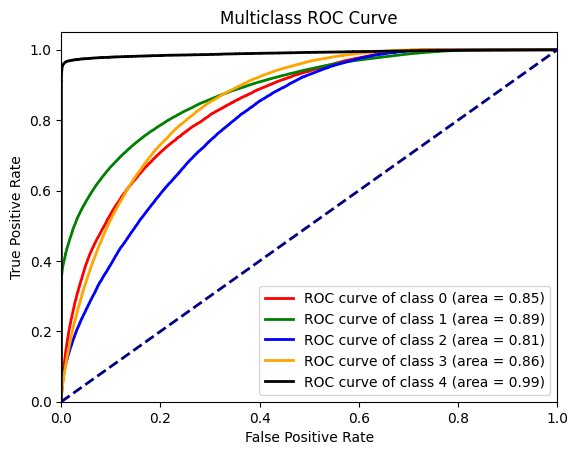

In [ ]:

y_val_bin = label_binarize(y_val, classes=np.unique(y_val))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_val))):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_pred_cat_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2

for i, color in zip(range(len(np.unique(y_val))), ['red', 'green', 'blue','orange','black']):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_recap = le.inverse_transform(y)
print(np.unique(y_recap))

['B' 'H' 'O' 'W' 'X']


**Based on the plot above, we may deduce that individuals of race "X" are more likely to commit crimes followed by Hispanics, with scores of 0.89 and 0.99, respectively.**